In [1]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [2]:
import tensorflow as tf 
from keras import layers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import datetime
from alexnet import AlexNet

In [3]:
# Set the GPU growth in order to avoid the sudden stop of the runtime. 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
# Give the global constants.Please notify BATCH_SIZE for model.fit() and Batch_Size for 
# model.evaluate() and model.predict()
EPOCHS = 50
BATCH_SIZE = 32
Batch_Size = 1
image_width = 227
image_height = 227
channels = 3
num_classes = 6

In [5]:
# Call the alexnet model in alexnet.py
model = AlexNet((image_width,image_height,channels), num_classes)

In [6]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [7]:
# It will output the AlexNet model after executing the command 
model.summary()

Model: "alex_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       884

In [8]:
train_dir = '/home/mike/Documents/Six_Classify_AlexNet/seg_train/seg_train'
test_dir = '/home/mike/Documents/Six_Classify_AlexNet/seg_test/seg_test'
predict_dir = '/home/mike/Documents/Six_Classify_AlexNet/seg_pred/'

In [9]:
# keras.preprocessing.image.ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255)

# keras.preprocessing.image.DirectoryIterator
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(image_width,image_height), 
                                                    class_mode='categorical')

train_num = train_generator.samples

Found 14034 images belonging to 6 classes.


In [10]:
# Start Tensorboard --logdir logs/fit
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
callback_list = [tensorboard_callback]

In [11]:
# Set verbose=1 (or verbose=0) for visibale (or invisible) training procedure. 
model.fit(train_generator,
          epochs=EPOCHS,
          steps_per_epoch=train_num//BATCH_SIZE,
          callbacks=callback_list,
          verbose=1)

Epoch 1/50
438/438 [==============================] - 20s 46ms/step - loss: 1.8011 - accuracy: 0.3783
Epoch 2/50
438/438 [==============================] - 16s 36ms/step - loss: 1.0303 - accuracy: 0.5844
Epoch 3/50
438/438 [==============================] - 16s 36ms/step - loss: 0.9413 - accuracy: 0.6268
Epoch 4/50
438/438 [==============================] - 16s 36ms/step - loss: 0.8737 - accuracy: 0.6553
Epoch 5/50
438/438 [==============================] - 16s 36ms/step - loss: 0.8371 - accuracy: 0.6740
Epoch 6/50
438/438 [==============================] - 16s 37ms/step - loss: 0.8143 - accuracy: 0.6885
Epoch 7/50
438/438 [==============================] - 16s 37ms/step - loss: 0.7421 - accuracy: 0.7278
Epoch 8/50
438/438 [==============================] - 16s 37ms/step - loss: 0.6796 - accuracy: 0.7535
Epoch 9/50
438/438 [==============================] - 16s 37ms/step - loss: 0.6597 - accuracy: 0.7690
Epoch 10/50
438/438 [==============================] - 16s 36ms/step - loss: 0.599

In [12]:
%tensorboard --logdir logs/fit

In [13]:
# It is the test generator as similar as the above. 
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(image_width,image_height), 
                                                  class_mode='categorical')

test_num = test_generator.samples

Found 3000 images belonging to 6 classes.


In [16]:
# Evalute the trained model and return both the loss and the test accuracy. 
evals = model.evaluate(test_generator,
                      verbose=1,
                      batch_size=Batch_Size,
                      steps=test_num//Batch_Size)

print("Loss = " + str(evals[0]))
print("Test Accuracy = " + str(evals[1]))

3000/3000 [==============================] - 79s 26ms/step - loss: 1.1263 - accuracy: 0.7997
Loss = 1.1262983083724976
Test Accuracy = 0.7996636629104614


In [17]:
# Give the implicit steps=7301 for selecting the specific image number.
predict_datagen = ImageDataGenerator(rescale=1.0/255)

predict_generator = predict_datagen.flow_from_directory(predict_dir, 
                                                        target_size=(image_width,image_height),
                                                        batch_size=Batch_Size,
                                                        class_mode='categorical')

predict_num = predict_generator.samples

Found 7301 images belonging to 1 classes.


In [18]:
# Make the prediction for any one of the predicted images 
predictions = model.predict(predict_generator,
                            verbose=1,
                            batch_size=Batch_Size,
                            steps=predict_num//Batch_Size)

7301/7301 [==============================] - 18s 3ms/step


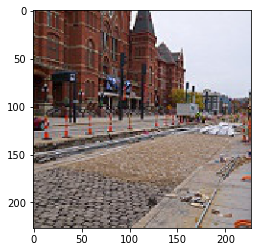

In [19]:
# Plot the discriptive diagram 
imshow(predict_generator[256][0][0])
plt.imsave("predicted1.png",predict_generator[256][0][0])

In [20]:
predictions[256]

array([2.8667313e-09, 6.9807847e-11, 9.9992776e-01, 3.0777843e-05,
       1.2428696e-07, 4.1377225e-05], dtype=float32)

In [21]:
print(predictions[256])

[2.8667313e-09 6.9807847e-11 9.9992776e-01 3.0777843e-05 1.2428696e-07
 4.1377225e-05]


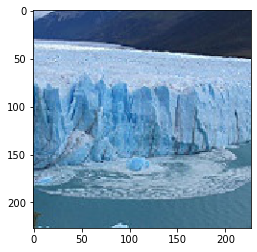

In [22]:
imshow(predict_generator[1024][0][0])

In [23]:
predictions[1024]

array([6.2715379e-04, 1.1770270e-02, 4.3954037e-02, 7.2704136e-01,
       2.1660675e-01, 4.0719689e-07], dtype=float32)

In [24]:
import os 

def get_category(predicted_output):
    return os.listdir(train_dir)[np.argmax(predicted_output)] 

In [25]:
print(get_category(predictions[2048]))

mountain


Text(0.5, 1.0, 'forest')

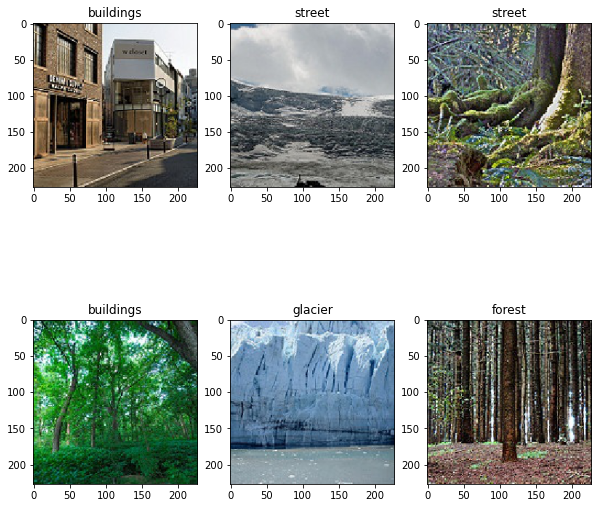

In [26]:
fig, axs = plt.subplots(2, 3, figsize=(10,10))

axs[0][0].imshow(predict_generator[32][0][0])
axs[0][0].set_title(get_category(predictions[32]))

axs[0][1].imshow(predict_generator[64][0][0])
axs[0][1].set_title(get_category(predictions[64]))

axs[0][2].imshow(predict_generator[128][0][0])
axs[0][2].set_title(get_category(predictions[128]))

axs[1][0].imshow(predict_generator[512][0][0])
axs[1][0].set_title(get_category(predictions[512]))

axs[1][1].imshow(predict_generator[1000][0][0])
axs[1][1].set_title(get_category(predictions[1000]))

axs[1][2].imshow(predict_generator[2000][0][0])
axs[1][2].set_title(get_category(predictions[2000]))